[View in Colaboratory](https://colab.research.google.com/github/tiagoandresvaz/curso_machine_learning_na_saude/blob/master/Introdu%C3%A7%C3%A3o_ao_Aprendizado_de_M%C3%A1quina_na_Sa%C3%BAde_Custo_M%C3%ADnimo.ipynb)

**Introdução ao Aprendizado de Máquina na Saúde - Custo Mínimo.ipynb**

```
Utiliza dados de 303 pacientes para inferir com o uso dos algoritmos Naive Bayes, Decision Tree e Random Forest a melhor resposta para a pergunta: 

Quais pacientes devem fazer um novo tipo de exame com objetivo de evitar ao máximo o desperdício de recursos financeiros? 

Segundo os gestores do hospital, cada erro está associado a um custo financeiro de até oitocentos reais.

```





 1- Inicia instalando no ambiente do usuário no Google Colab os pacotes:

**Matplotlib** 

https://matplotlib.org/

**Orange**

https://orange.biolab.si




In [4]:
!pip install -q matplotlib
!pip install Orange3


    100% |████████████████████████████████| 22.4MB 2.0MB/s 
    100% |████████████████████████████████| 112kB 26.7MB/s 
    100% |████████████████████████████████| 552kB 23.9MB/s 
    100% |████████████████████████████████| 1.6MB 18.4MB/s 
    100% |████████████████████████████████| 112kB 27.0MB/s 
    100% |████████████████████████████████| 61kB 25.5MB/s 
    100% |████████████████████████████████| 2.1MB 10.3MB/s 
    100% |████████████████████████████████| 102kB 29.3MB/s 
    100% |████████████████████████████████| 430kB 24.6MB/s 
    100% |████████████████████████████████| 256kB 26.5MB/s 
  Running setup.py bdist_wheel for Orange3 ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done
  Stored in directory: /root/.cache/pip/wheels/25/2e/3c/20bcffd8fc2bf6ac398ba69394f5c93e2f508fc45971018971
  Running setup.py bdist_wheel for bottleneck ... - \ | / - \ | / done
  Stored in directory: /root/.cache/pip/wheels/f2/b

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import Orange 
from collections import Counter

from Orange.data import Table
from Orange.classification import NaiveBayesLearner, TreeLearner, RandomForestLearner 
from Orange.evaluation import CrossValidation
from Orange.evaluation import AUC
from Orange.evaluation import CA


import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0



2 - Após importar e declarar as bibliotecas para o uso neste código, valida o uso da GPU. 

O trecho abaixo inicia a carga na memória dos dados dos pacientes, descreve as variáveis e imprime 5 linhas de exemplos.


In [6]:
heart = Table("heart_disease")

n = len(heart.domain.attributes)
n_cont = sum(1 for a in heart.domain.attributes if a.is_continuous)
n_disc = sum(1 for a in heart.domain.attributes if a.is_discrete)

print("Atributos:", ", ".join(x.name for x in heart.domain.attributes))
print("Classe:", heart.domain.class_var.name)
print("%d variáveis: %d continuas, %d discretas" % (n, n_cont, n_disc))
print("Total de Instâncias", len(heart))

print("Distribuição da Classe:",Counter(str(d.get_class()) for d in heart))

print("Amostra:" ,heart[:5])



Atributos: age, gender, chest pain, rest SBP, cholesterol, fasting blood sugar > 120, rest ECG, max HR, exerc ind ang, ST by exercise, slope peak exc ST, major vessels colored, thal
Classe: diameter narrowing
13 variáveis: 6 continuas, 7 discretas
Total de Instâncias 303
Distribuição da Classe: Counter({'0': 164, '1': 139})
Amostra: [[63, male, typical ang, 145, 233, 1, left vent hypertrophy, 150, 0, 2.3, downsloping, 0, fixed defect | 0],
 [67, male, asymptomatic, 160, 286, 0, left vent hypertrophy, 108, 1, 1.5, flat, 3, normal | 1],
 [67, male, asymptomatic, 120, 229, 0, left vent hypertrophy, 129, 1, 2.6, flat, 2, reversable defect | 1],
 [37, male, non-anginal, 130, 250, 0, normal, 187, 0, 3.5, downsloping, 0, normal | 0],
 [41, female, atypical ang, 130, 204, 0, left vent hypertrophy, 172, 0, 1.4, upsloping, 0, normal | 0]]


3 - Após, é feito o treinamento com validação cruzada (k=5) na classificação de pacientes, retornando a probabilidade de um paciente estar doente.  (Faça um teste e compare com os resultados utilizando k=50)


In [7]:
nb = NaiveBayesLearner()
dt = TreeLearner(max_depth=3)
rf = RandomForestLearner(n_estimators=100)
learners = [nb, dt, rf]
scores = CrossValidation(heart, learners , k=5)

print("COMPARANDO MODELOS PREDITIVOS: Acurácia, Area Under The Curve (AUC)")
print("Naive Bayes")
print("Acurácia: %.2f" % CA(scores)[0])
print("AUC:      %.2f" % AUC(scores)[0])

print("Decision Tree")
print("Acurácia: %.2f" % CA(scores)[1])
print("AUC:      %.2f" % AUC(scores)[1])

print("Random Forrest")
print("Acurácia: %.2f" % CA(scores)[2])
print("AUC:      %.2f" % AUC(scores)[2])

#calcula as probabilidades do paciente esta doente (1) com os 3 modelos
p1 = scores.probabilities[0][:, 1]
p2 = scores.probabilities[1][:, 1]
p3 = scores.probabilities[2][:, 1]

print("COMPARANDO RESULTADOS PREDITIVOS: Amostra de 5 pacientes")
#mostra valores reais, se o paciente esta doente (1) ou não (0)
y = scores.actual
print("Real",y[:5])

#mostra probabilidades calculadas por cada algoritmo
print("Naive Bayes",p1[:5])
print("Decision Tree",p2[:5])
print("Random Forrest",p3[:5])


COMPARANDO MODELOS PREDITIVOS: Acurácia, Area Under The Curve (AUC)
Naive Bayes
Acurácia: 0.83
AUC:      0.91
Decision Tree
Acurácia: 0.72
AUC:      0.77
Random Forrest
Acurácia: 0.81
AUC:      0.90
COMPARANDO RESULTADOS PREDITIVOS: Amostra de 5 pacientes
Real [1. 0. 0. 1. 1.]
Naive Bayes [0.9274096  0.00225076 0.03782657 0.75856656 0.9936614 ]
Decision Tree [0.8518519 0.5       0.5185185 0.        0.6666667]
Random Forrest [0.7  0.21 0.2  0.51 0.68]


Foram comparados os seguintes algoritmos:


**Naive Bayes**
classification.NaiveBayesLearner(preprocessors=None)
Naive Bayes classifier. Works only with discrete attributes. By default, continuous attributes are discretized.


**Decision Tree**
classification.TreeLearner(args, binarize=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, sufficient_majority=0.95, preprocessors=None).

The tree growth can be limited by the required number of instances for internal nodes and for leafs, the sufficient proportion of majority class, and by the maximal depth of the tree.

**Random Forest**
classification.RandomForestLearner(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, class_weight=None, preprocessors=None)

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. 


In [8]:
#Para cada treshold calculamos um vetor de probabilidades (ps) e custos associados (costs).

#Custo de R$700,00 para os Falso-positivos (paciente classificado doente quando saudável)
fp_cost = 700

#Custo de R$800,00 do Falso-negativo (paciente classificado saudável quando doente)
fn_cost = 800

#declaramos que o threshold > 1 (ninguém está doente)
#falso positivo = 0
fp = 0
#falso negativo inicia com o nro de verdadeiros positivos
fn = np.sum(y)

print ("Total de falso positivos:", fp)
print ("Total de falso negativo:", fn)

ps = []
costs = []
#calcula os custos de classificar i pacientes como doentes (Naive Bayes)
for i in np.argsort(p1)[::-1]:
   if y[i] == 0:
       fp += 1
       #print(fp)
   else:
       fn -= 1
       #print(fn)

   ps.append(p1[i])
   costs.append(fp * fp_cost + fn * fn_cost)
   
print("Amostra do vetor com as probabilidades",ps[:5])
print ("Amostra do vetor com previsões de custos",costs[:5])
#ordena as previsões de custos e seleciona a probabilidade relacionada ao menor custo encontrado
costs = np.array(costs)
ps = np.array(ps)

#Para ver os datasets completos
#print(costs)
#print(ps)

#pacientes acima desta probabilidade trarão o menor custo
print("Treshold: ", ps[costs.argmin()])
print("Custo mínimo: R$",costs[costs.argmin()])




Total de falso positivos: 0
Total de falso negativo: 139.0
Amostra do vetor com as probabilidades [0.9999724, 0.99996626, 0.9999407, 0.99993646, 0.9999265]
Amostra do vetor com previsões de custos [110400.0, 109600.0, 108800.0, 108000.0, 107200.0]
Treshold:  0.57604045
Custo mínimo: R$ 37100.0


4 - Este resultado é o treshold que minimiza os custos da classificação dos pacientes.

Ao final, compreendemos que os médicos podem mandar fazer o novo exame em todos os pacientes que no futuro apresentarem a probabilidade de estarem doentes maior ou igual a este treshold. 

O gráfico para analisar o treshold pode ser representado assim:

Text(0,0.5,'Custo')

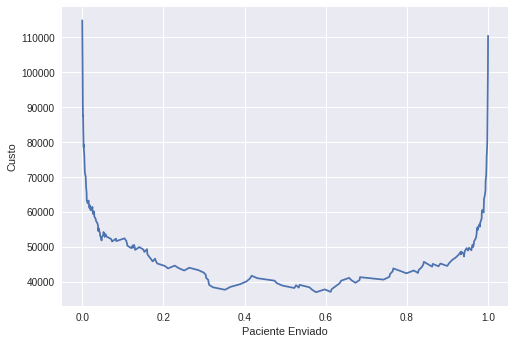

In [9]:
fig, ax = plt.subplots()
plt.plot(ps, costs)
ax.set_xlabel('Paciente Enviado')
ax.set_ylabel('Custo')